In [1]:
from qu_plot.io import LOSIo
from csromer.wrappers.reconstructors import CSROMERReconstructorWrapper, PolAngleGradientReconstructorWrapper
import matplotlib.pylab as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ModuleNotFoundError: No module named 'csromer.wrappers'

In [2]:
los_io = LOSIo(input_name="~/Documents/datasets/meerkat/COSMOS/LOS_txt/ID3467_polspec.txt")

In [3]:
dataset = los_io.read()

In [4]:
reconstructor = CSROMERReconstructor(dataset=dataset, oversampling=12)

FWHM of the main peak of the RMTF: 51.712 rad/m^2
Maximum recovered width structure: 66.561 rad/m^2
Maximum Faraday Depth to which one has more than 50% sensitivity: 2869.991


In [5]:
reconstructor.reconstruct()

Iterations set to 173
Iteration:  0  objective function value: 18808.76531
Iteration:  10  objective function value: 18808.76531
Iteration:  20  objective function value: 18808.76531
Iteration:  30  objective function value: 18808.76531
Iteration:  40  objective function value: 75799.42661
Iteration:  50  objective function value: 345627.80420
Iteration:  60  objective function value: 518788.27344
Iteration:  70  objective function value: 620248.23992
Iteration:  80  objective function value: 725877.95817
Iteration:  90  objective function value: 766217.80763
Iteration:  100  objective function value: 773224.23537
Iteration:  110  objective function value: 756909.50747
Iteration:  120  objective function value: 734667.15544
Iteration:  130  objective function value: 690189.83622
Iteration:  140  objective function value: 636282.28627
Iteration:  150  objective function value: 516079.14057
Iteration:  160  objective function value: 339437.41908
Iteration:  170  objective function value:

In [7]:
reconstructor.second_moment

141417.58050491777

In [8]:
pol_angle_gradient_reconstructor = PolAngleGradientReconstructor(dataset=dataset)

In [9]:
pfit = pol_angle_gradient_reconstructor.reconstruct()

In [10]:
def line_eq(p, x):
    m, c = p
    return m * x + c

In [11]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.texsystem": 'pdflatex',  # default is xetex
    }
)

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)  # legend fontsize

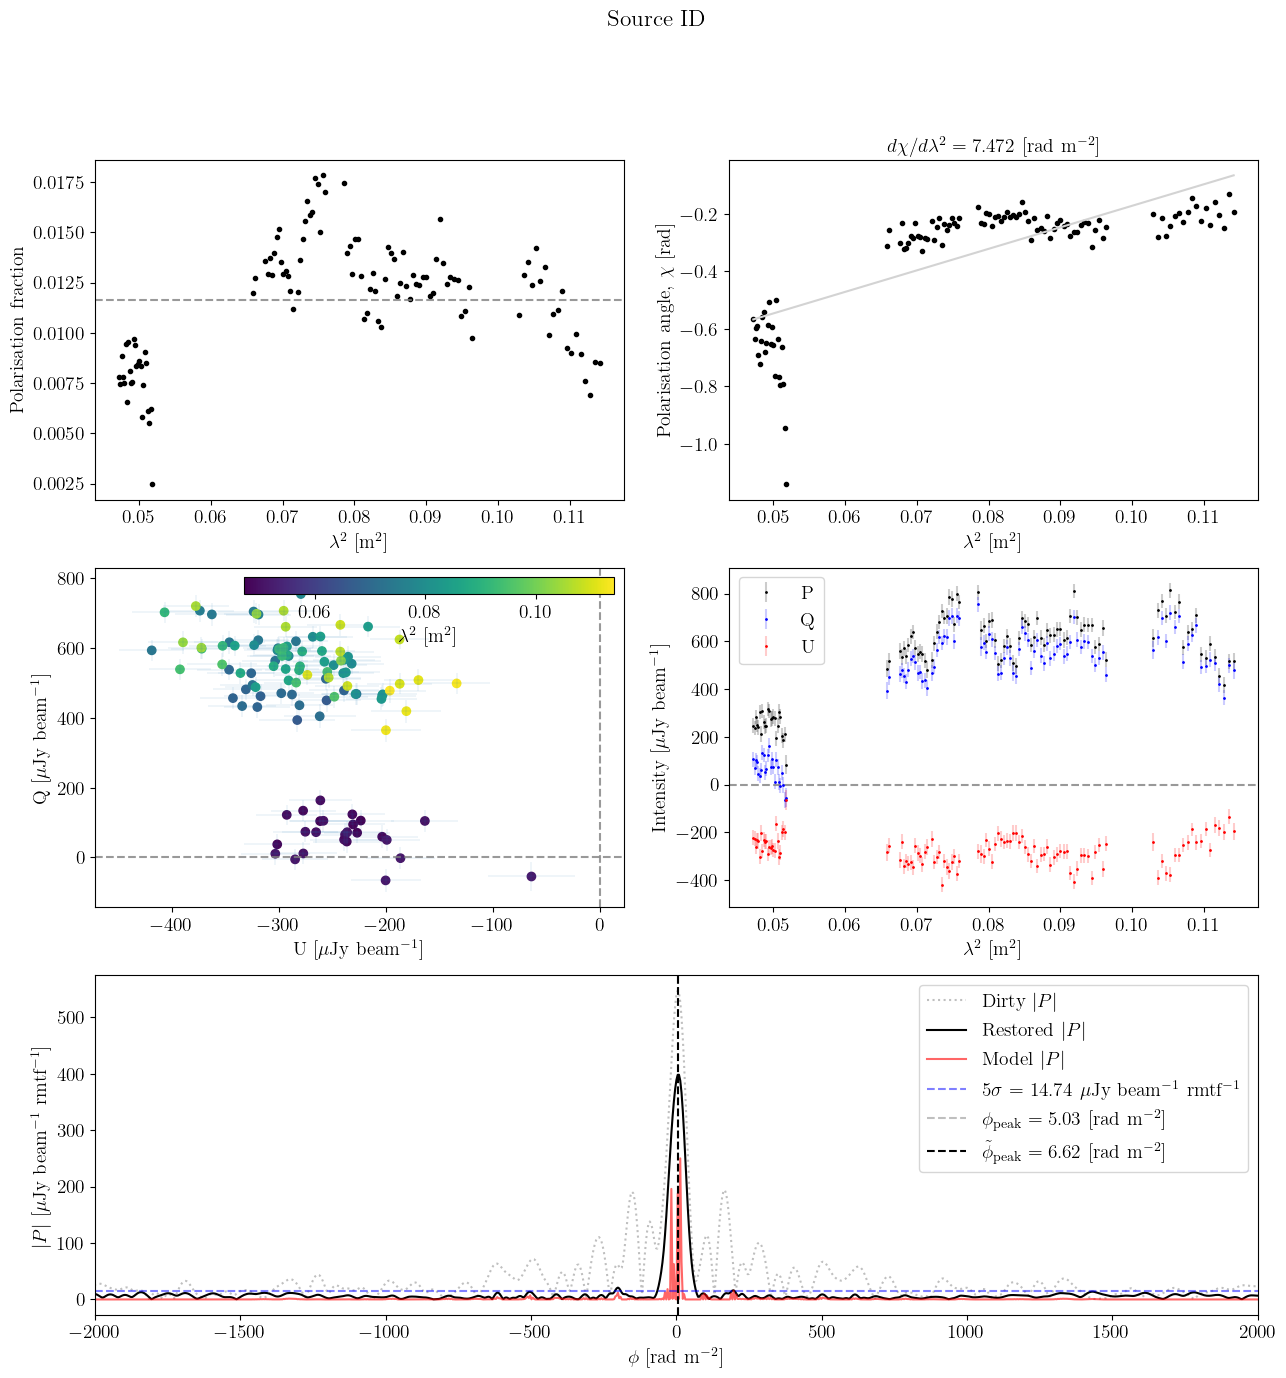

In [26]:
fig, axes = plt.subplot_mosaic("AB;CD;EE")
fig.set_figheight(15)
fig.set_figwidth(15)


pol_fraction = np.abs(dataset.data)/los_io.stokes_I[::-1]
pol_fraction_avg = np.average(pol_fraction)
axes["A"].plot(dataset.lambda2, pol_fraction, "k.")
axes["A"].axhline(y=pol_fraction_avg, color="grey", linestyle="--", alpha=0.8)
axes["A"].set_xlabel(r'$\lambda^2$ [m$^2$]')
axes["A"].set_ylabel("Polarisation fraction")

axes["B"].plot(dataset.lambda2, dataset.calculate_polangle(), "k.")
axes["B"].plot(dataset.lambda2, line_eq(pfit,dataset.lambda2), c='lightgray')
axes["B"].set_xlabel(r'$\lambda^2$ [m$^2$]')
axes["B"].set_ylabel(r'Polarisation angle, $\chi$ [rad]')
axes["B"].set_title(r'$d\chi/d\lambda^2={0:0.3f}$ {1}'.format(pol_angle_gradient_reconstructor.reconstructed_phi_0, r'[rad m$^{-2}$]'))


axes["C"].errorbar(dataset.data.imag, dataset.data.real, yerr=dataset.sigma, xerr=dataset.sigma, fmt='', lw=0.1, ls='')
sc = axes["C"].scatter(dataset.data.imag, dataset.data.real, c=dataset.lambda2, cmap='viridis')
axes["C"].axhline(y=0, color='grey', linestyle="--", alpha=0.8)
axes["C"].axvline(x=0, color='grey', linestyle="--", alpha=0.8)
axes["C"].set_xlabel('U [$\mu$Jy beam$^{-1}$]')
axes["C"].set_ylabel('Q [$\mu$Jy beam$^{-1}$]')
cbaxes = inset_axes(axes["C"], width="70%", height="5%", loc=1)
fig.colorbar(sc, cax=cbaxes, orientation='horizontal', label=r"$\lambda^2$ [m$^2$]")
#cbar = fig.colorbar(sc, ax=axes["C"], orientation='vertical', location="right")
#cbar.set_label(r'$\lambda^2$ [m$^2$]')

markers, caps, bars = axes["D"].errorbar(dataset.lambda2, np.abs(dataset.data), yerr=dataset.sigma, fmt="k.", label="P", ms=2)
[bar.set_alpha(0.2) for bar in bars]
[cap.set_alpha(0.2) for cap in caps]
markers, caps, bars = axes["D"].errorbar(dataset.lambda2, dataset.data.real, yerr=dataset.sigma, fmt="b.", label="Q", ms=2)
[bar.set_alpha(0.2) for bar in bars]
[cap.set_alpha(0.2) for cap in caps]
markers, caps, bars = axes["D"].errorbar(dataset.lambda2, dataset.data.imag, yerr=dataset.sigma, fmt="r.", label="U", ms=2)
[bar.set_alpha(0.2) for bar in bars]
[cap.set_alpha(0.2) for cap in caps]
axes["D"].axhline(y=0, color='grey', linestyle="--", alpha=0.8)
axes["D"].set_xlabel(r'$\lambda^2$ [m$^2$]')
axes["D"].set_ylabel(r'Intensity [$\mu$Jy beam$^{-1}$]')
axes["D"].legend()

axes["E"].plot(reconstructor.parameter.phi, np.abs(reconstructor.fd_dirty), "k:", alpha=0.25, label=r'Dirty $|P|$')
axes["E"].plot(reconstructor.parameter.phi, np.abs(reconstructor.fd_restored), "k-", label=r'Restored $|P|$')
axes["E"].plot(reconstructor.parameter.phi, np.abs(reconstructor.fd_model)/(reconstructor.parameter.rmtf_fwhm/reconstructor.parameter.cellsize), color="red", alpha=0.6, label=r'Model $|P|$')
axes["E"].axhline(y=5*dataset.theo_noise, color='blue', linestyle="--", alpha=0.5, label=r"5$\sigma$ = {0:0.2f} $\mu$Jy beam$^{1}$ rmtf$^{2}$".format(5*dataset.theo_noise, "{-1}", "{-1}"))
axes["E"].axvline(x=reconstructor.rm_dirty_quadratic_interpolation, color='black', linestyle="--", alpha=0.25, label=r"$\phi_{0} = {1:0.2f}$ [rad m$^{2}$]".format(r"{\rm peak}", reconstructor.rm_dirty_quadratic_interpolation, "{-2}"))
axes["E"].axvline(x=reconstructor.rm_restored_quadratic_interpolation, color='black', linestyle="--", label=r"$\tilde\phi_{0} = {1:0.2f}$ [rad m$^{2}$]".format(r"{\rm peak}", reconstructor.rm_restored_quadratic_interpolation, "{-2}"))
axes["E"].set_xlim([-2000, 2000])
axes["E"].set_xlabel(r'$\phi$ [rad m$^{-2}$]')
axes["E"].set_ylabel(r'$|P|$ [$\mu$Jy beam$^{-1}$ rmtf$^{-1}$]')
axes["E"].legend()

fig.suptitle("Source ID")

#fig.tight_layout()

fig.savefig("first_test.pdf")